## Computer vision data

In [ ]:
%matplotlib inline
from fastai.gen_doc.nbdoc import *
from fastai.vision import * 

This module contains the classes that define datasets handling [`Image`](/vision.image.html#Image) objects and their transformations. As usual, we'll start with a quick overview, before we get in to the detailed API docs.

Before any work can be done a dataset needs to be converted into a [`DataBunch`](/basic_data.html#DataBunch) object, and in the case of the computer vision data - specifically into an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) subclass.

This is done with the help of [data block API](/data_block.html) and the [`ImageList`](/vision.data.html#ImageList) class and its subclasses.
 
However, there is also a group of shortcut methods provided by [`ImageDataBunch`](/vision.data.html#ImageDataBunch) which reduce the multiple stages of the data block API, into a single wrapper method. These shortcuts methods work really well for:
- Imagenet-style of datasets ([`ImageDataBunch.from_folder`](/vision.data.html#ImageDataBunch.from_folder))
- A pandas `DataFrame` with a column of filenames and a column of labels which can be strings for classification, strings separated by a `label_delim` for multi-classification or floats for a regression problem ([`ImageDataBunch.from_df`](/vision.data.html#ImageDataBunch.from_df))
- A csv file with the same format as above ([`ImageDataBunch.from_csv`](/vision.data.html#ImageDataBunch.from_csv))
- A list of filenames and a list of targets ([`ImageDataBunch.from_lists`](/vision.data.html#ImageDataBunch.from_lists))
- A list of filenames and a function to get the target from the filename ([`ImageDataBunch.from_name_func`](/vision.data.html#ImageDataBunch.from_name_func))
- A list of filenames and a regex pattern to get the target from the filename ([`ImageDataBunch.from_name_re`](/vision.data.html#ImageDataBunch.from_name_re))

In the last five factory methods, a random split is performed between train and validation, in the first one it can be a random split or a separation from a training and a validation folder.

If you're just starting out you may choose to experiment with these shortcut methods, as they are also used in the first lessons of the fastai deep learning course. However, you can completely skip them and start building your code using the data block API from the very beginning. Internally, these shortcuts use this API anyway.

The first part of this document is dedicated to the shortcut [`ImageDataBunch`](/vision.data.html#ImageDataBunch) factory methods. Then all the other computer vision data-specific methods that are used with the data block API are presented.

## Quickly get your data ready for training

To get you started as easily as possible, the fastai provides two helper functions to create a [`DataBunch`](/basic_data.html#DataBunch) object that you can directly use for training a classifier. To demonstrate them you'll first need to download and untar the file by executing the following cell. This will create a data folder containing an MNIST subset in `data/mnist_sample`.

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/ubuntu/.fastai/data/mnist_sample')

There are a number of ways to create an [`ImageDataBunch`](/vision.data.html#ImageDataBunch). One common approach is to use *Imagenet-style folders* (see a ways down the page below for details) with [`ImageDataBunch.from_folder`](/vision.data.html#ImageDataBunch.from_folder):

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)

Here the datasets will be automatically created in the structure of *Imagenet-style folders*. The parameters specified:
- the transforms to apply to the images in `ds_tfms` (here with `do_flip`=False because we don't want to flip numbers),
- the target `size` of our pictures (here 24).

As with all [`DataBunch`](/basic_data.html#DataBunch) usage,  a `train_dl` and a `valid_dl` are created that are of the type PyTorch [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). 

If you want to have a look at a few images inside a batch, you can use [`DataBunch.show_batch`](/basic_data.html#DataBunch.show_batch). The `rows` argument is the number of rows and columns to display.

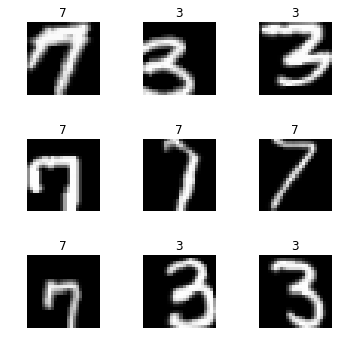

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

The second way to define the data for a classifier requires a structure like this:
```
path\
  train\
  test\
  labels.csv
```
where the labels.csv file defines the label(s) of each image in the training set. This is the format you will need to use when each image can have multiple labels. It also works with single labels:

In [ ]:
pd.read_csv(path/'labels.csv').head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


You can then use [`ImageDataBunch.from_csv`](/vision.data.html#ImageDataBunch.from_csv):

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

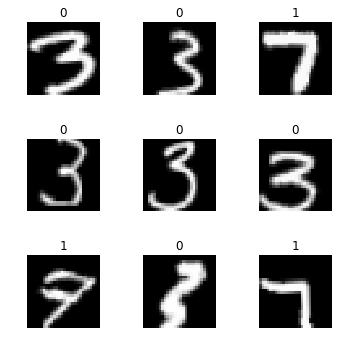

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

An example of multiclassification can be downloaded with the following cell. It's a sample of the [planet dataset](https://www.google.com/search?q=kaggle+planet&rlz=1C1CHBF_enFR786FR786&oq=kaggle+planet&aqs=chrome..69i57j0.1563j0j7&sourceid=chrome&ie=UTF-8).

In [ ]:
planet = untar_data(URLs.PLANET_SAMPLE)

If we open the labels files, we seach that each image has one or more tags, separated by a space.

In [ ]:
df = pd.read_csv(planet/'labels.csv')
df.head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


In [ ]:
data = ImageDataBunch.from_csv(planet, folder='train', size=128, suffix='.jpg', label_delim=' ',
    ds_tfms=get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))

The `show_batch`method will then print all the labels that correspond to each image.

In [ ]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Valid)

You can find more ways to build an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) without the factory methods in [`data_block`](/data_block.html#data_block).

In [ ]:
show_doc(ImageDataBunch)

<h2 id="ImageDataBunch" class="doc_header"><code>class</code> <code>ImageDataBunch</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L85" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>ImageDataBunch</code>(**`train_dl`**:[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), **`valid_dl`**:[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), **`fix_dl`**:[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)=***`None`***, **`test_dl`**:`Optional`\[[`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)\]=***`None`***, **`device`**:[`device`](https://pytorch.org/docs/stable/tensor_attributes.html#torch-device)=***`None`***, **`dl_tfms`**:`Optional`\[`Collection`\[`Callable`\]\]=***`None`***, **`path`**:`PathOrStr`=***`'.'`***, **`collate_fn`**:`Callable`=***`'data_collate'`***, **`no_check`**:`bool`=***`False`***) :: [`DataBunch`](/basic_data.html#DataBunch)

<div class="collapse" id="ImageDataBunch-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>ImageDataBunch</code>:</p><p>Some other tests where <code>ImageDataBunch</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_clean_tear_down</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L112" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_denormalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L134" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_from_csv_and_from_df</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L54" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_from_folder</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L26" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_from_lists</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L39" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_from_name_re</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L32" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_resize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L70" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_multi_iter</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L106" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_multi_iter_broken</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L101" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_normalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L120" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_path_can_be_str_type</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L22" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

DataBunch suitable for computer vision.  

This is the same initialization as a regular [`DataBunch`](/basic_data.html#DataBunch) so you probably don't want to use this directly, but one of the factory methods instead.

### Factory methods

If you quickly want to get a [`ImageDataBunch`](/vision.data.html#ImageDataBunch) and train a model, you should process your data to have it in one of the formats the following functions handle. 

In [ ]:
show_doc(ImageDataBunch.from_folder)

<h4 id="ImageDataBunch.from_folder" class="doc_header"><code>from_folder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L102" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-from_folder-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>from_folder</code>(**`path`**:`PathOrStr`, **`train`**:`PathOrStr`=***`'train'`***, **`valid`**:`PathOrStr`=***`'valid'`***, **`valid_pct`**=***`None`***, **`classes`**:`Collection`\[`T_co`\]=***`None`***, **\*\*`kwargs`**:`Any`) → `ImageDataBunch`

<div class="collapse" id="ImageDataBunch-from_folder-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-from_folder-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>from_folder</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_from_folder</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L26" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>from_folder</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_camvid</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L238" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_clean_tear_down</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L112" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_coco</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L267" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_coco_pickle</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L297" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_coco_same_size</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L280" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_denormalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L134" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_resize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L70" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_to_image_different_tfms</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L328" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_to_image_different_y_size</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L313" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_multi_iter</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L106" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_multi_iter_broken</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L101" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_normalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L120" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_points</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L254" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_vision_datasets</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L217" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).  

Refer to [`create_from_ll`](#ImageDataBunch.create_from_ll) to see all the `**kwargs` arguments.

"*Imagenet-style*" datasets look something like this (note that the test folder is optional):

```
path\
  train\
    clas1\
    clas2\
    ...
  valid\
    clas1\
    clas2\
    ...
  test\
```

For example:

In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)

Note that this (and all factory methods in this section) pass any `kwargs` to [`DataBunch.create`](/basic_data.html#DataBunch.create).

In [ ]:
show_doc(ImageDataBunch.from_csv)

<h4 id="ImageDataBunch.from_csv" class="doc_header"><code>from_csv</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L122" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-from_csv-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>from_csv</code>(**`path`**:`PathOrStr`, **`folder`**:`PathOrStr`=***`None`***, **`label_delim`**:`str`=***`None`***, **`csv_labels`**:`PathOrStr`=***`'labels.csv'`***, **`valid_pct`**:`float`=***`0.2`***, **`fn_col`**:`int`=***`0`***, **`label_col`**:`int`=***`1`***, **`suffix`**:`str`=***`''`***, **`delimiter`**:`str`=***`None`***, **`header`**:`Union`\[`int`, `str`, `NoneType`\]=***`'infer'`***, **\*\*`kwargs`**:`Any`) → `ImageDataBunch`

<div class="collapse" id="ImageDataBunch-from_csv-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-from_csv-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>from_csv</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_from_csv_and_from_df</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L54" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_path_can_be_str_type</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L22" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>from_csv</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_multi</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L227" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Create from a csv file in `path/csv_labels`.  

Refer to [`create_from_ll`](#ImageDataBunch.create_from_ll) to see all the `**kwargs` arguments.

Create an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) from `path` by splitting the data in `folder` and labelled in a file `csv_labels` between a training and validation set. Use `valid_pct` to indicate the percentage of the total images to use as the validation set. An optional `test` folder contains unlabelled data and `suffix` contains an optional suffix to add to the filenames in `csv_labels` (such as '.jpg'). `fn_col` is the index (or the name) of the the column containing the filenames and `label_col` is the index (indices) (or the name(s)) of the column(s) containing the labels. Use [`header`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas-read-csv) to specify the format of the csv header, and `delimiter` to specify a non-standard csv-field separator. In case your csv has no header, column parameters can only be specified as indices. If `label_delim` is passed, split what's in the label column according to that separator.

For example:

In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=24);

In [ ]:
show_doc(ImageDataBunch.from_df)

<h4 id="ImageDataBunch.from_df" class="doc_header"><code>from_df</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L113" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-from_df-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>from_df</code>(**`path`**:`PathOrStr`, **`df`**:`DataFrame`, **`folder`**:`PathOrStr`=***`None`***, **`label_delim`**:`str`=***`None`***, **`valid_pct`**:`float`=***`0.2`***, **`fn_col`**:`IntsOrStrs`=***`0`***, **`label_col`**:`IntsOrStrs`=***`1`***, **`suffix`**:`str`=***`''`***, **\*\*`kwargs`**:`Any`) → `ImageDataBunch`

<div class="collapse" id="ImageDataBunch-from_df-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-from_df-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>from_df</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_from_csv_and_from_df</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L54" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Create from a `DataFrame` `df`.  

Refer to [`create_from_ll`](#ImageDataBunch.create_from_ll) to see all the `**kwargs` arguments.

Same as [`ImageDataBunch.from_csv`](/vision.data.html#ImageDataBunch.from_csv), but passing in a `DataFrame` instead of a csv file. e.g

In [ ]:
df = pd.read_csv(path/'labels.csv', header='infer')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [ ]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)

Different datasets are labeled in many different ways. The following methods can help extract the labels from the dataset in a wide variety of situations. The way they are built in fastai is constructive: there are methods which do a lot for you but apply in specific circumstances and there are methods which do less for you but give you more flexibility.

In this case the hierarchy is:

1. [`ImageDataBunch.from_name_re`](/vision.data.html#ImageDataBunch.from_name_re): Gets the labels from the filenames using a regular expression
2. [`ImageDataBunch.from_name_func`](/vision.data.html#ImageDataBunch.from_name_func): Gets the labels from the filenames using any function
3. [`ImageDataBunch.from_lists`](/vision.data.html#ImageDataBunch.from_lists): Labels need to be provided as an input in a list

In [ ]:
show_doc(ImageDataBunch.from_name_re)

<h4 id="ImageDataBunch.from_name_re" class="doc_header"><code>from_name_re</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L148" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-from_name_re-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>from_name_re</code>(**`path`**:`PathOrStr`, **`fnames`**:`FilePathList`, **`pat`**:`str`, **`valid_pct`**:`float`=***`0.2`***, **\*\*`kwargs`**)

<div class="collapse" id="ImageDataBunch-from_name_re-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-from_name_re-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>from_name_re</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_from_name_re</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L32" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_resize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L70" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Create from list of `fnames` in `path` with re expression `pat`.  

Refer to [`create_from_ll`](#ImageDataBunch.create_from_ll) to see all the `**kwargs` arguments.

Creates an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) from `fnames`, calling a regular expression (containing one *re group*) on the file names to get the labels, putting aside `valid_pct` for the validation. In the same way as [`ImageDataBunch.from_csv`](/vision.data.html#ImageDataBunch.from_csv), an optional `test` folder contains unlabelled data.

Our previously created dataframe contains the labels in the filenames so we can leverage it to test this new method. [`ImageDataBunch.from_name_re`](/vision.data.html#ImageDataBunch.from_name_re) needs the exact path of each file so we will append the data path to each filename before creating our [`ImageDataBunch`](/vision.data.html#ImageDataBunch) object.

In [ ]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/ubuntu/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_sample/train/3/21102.png')]

In [ ]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)

In [ ]:
data.classes

['3', '7']

In [ ]:
show_doc(ImageDataBunch.from_name_func)

<h4 id="ImageDataBunch.from_name_func" class="doc_header"><code>from_name_func</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L142" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-from_name_func-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>from_name_func</code>(**`path`**:`PathOrStr`, **`fnames`**:`FilePathList`, **`label_func`**:`Callable`, **`valid_pct`**:`float`=***`0.2`***, **\*\*`kwargs`**)

<div class="collapse" id="ImageDataBunch-from_name_func-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-from_name_func-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>from_name_func</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Create from list of `fnames` in `path` with `label_func`.  

Refer to [`create_from_ll`](#ImageDataBunch.create_from_ll) to see all the `**kwargs` arguments.

Works in the same way as [`ImageDataBunch.from_name_re`](/vision.data.html#ImageDataBunch.from_name_re), but instead of a regular expression it expects a function that will determine how to extract the labels from the filenames. (Note that `from_name_re` uses this function in its implementation).

To test it we could build a function with our previous regex. Let's try another, similar approach to show that the labels can be obtained in a different way.

In [ ]:
def get_labels(file_path): return '3' if '/3/' in str(file_path) else '7'
data = ImageDataBunch.from_name_func(path, fn_paths, label_func=get_labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [ ]:
show_doc(ImageDataBunch.from_lists)

<h4 id="ImageDataBunch.from_lists" class="doc_header"><code>from_lists</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L132" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-from_lists-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>from_lists</code>(**`path`**:`PathOrStr`, **`fnames`**:`FilePathList`, **`labels`**:`StrList`, **`valid_pct`**:`float`=***`0.2`***, **`item_cls`**:`Callable`=***`None`***, **\*\*`kwargs`**)

<div class="collapse" id="ImageDataBunch-from_lists-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-from_lists-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>from_lists</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_from_lists</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L39" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Create from list of `fnames` in `path`.  

Refer to [`create_from_ll`](#ImageDataBunch.create_from_ll) to see all the `**kwargs` arguments.

The most flexible factory function; pass in a list of `labels` that correspond to each of the filenames in `fnames`.

To show an example we have to build the labels list outside our [`ImageDataBunch`](/vision.data.html#ImageDataBunch) object and give it as an argument when we call `from_lists`. Let's use our previously created function to create our labels list.

In [ ]:
labels_ls = list(map(get_labels, fn_paths))
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels_ls, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [ ]:
show_doc(ImageDataBunch.create_from_ll)

<h4 id="ImageDataBunch.create_from_ll" class="doc_header"><code>create_from_ll</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L89" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-create_from_ll-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>create_from_ll</code>(**`lls`**:[`LabelLists`](/data_block.html#LabelLists), **`bs`**:`int`=***`64`***, **`val_bs`**:`int`=***`None`***, **`ds_tfms`**:`Union`\[`Callable`, `Collection`\[`Callable`\], `NoneType`\]=***`None`***, **`num_workers`**:`int`=***`4`***, **`dl_tfms`**:`Optional`\[`Collection`\[`Callable`\]\]=***`None`***, **`device`**:[`device`](https://pytorch.org/docs/stable/tensor_attributes.html#torch-device)=***`None`***, **`test`**:`Union`\[`Path`, `str`, `NoneType`\]=***`None`***, **`collate_fn`**:`Callable`=***`'data_collate'`***, **`size`**:`int`=***`None`***, **`no_check`**:`bool`=***`False`***, **`resize_method`**:[`ResizeMethod`](/vision.image.html#ResizeMethod)=***`None`***, **`mult`**:`int`=***`None`***, **`padding_mode`**:`str`=***`'reflection'`***, **`mode`**:`str`=***`'bilinear'`***, **`tfm_y`**:`bool`=***`False`***) → `ImageDataBunch`

<div class="collapse" id="ImageDataBunch-create_from_ll-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-create_from_ll-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>create_from_ll</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Create an [`ImageDataBunch`](/vision.data.html#ImageDataBunch) from [`LabelLists`](/data_block.html#LabelLists) `lls` with potential `ds_tfms`.  

Use `bs`, `num_workers`, `collate_fn` and a potential `test` folder. `ds_tfms` is a tuple of two lists of transforms to be applied to the training and the validation (plus test optionally) set. `tfms` are the transforms to apply to the [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). The `size` and the `kwargs` are passed to the transforms for data augmentation.

In [ ]:
show_doc(ImageDataBunch.single_from_classes)

<h4 id="ImageDataBunch.single_from_classes" class="doc_header"><code>single_from_classes</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L159" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-single_from_classes-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>single_from_classes</code>(**`path`**:`PathOrStr`, **`classes`**:`StrList`, **`ds_tfms`**:`Union`\[`Callable`, `Collection`\[`Callable`\]\]=***`None`***, **\*\*`kwargs`**)

<div class="collapse" id="ImageDataBunch-single_from_classes-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-single_from_classes-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>single_from_classes</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Create an empty [`ImageDataBunch`](/vision.data.html#ImageDataBunch) in `path` with `classes`. Typically used for inference.  

In [ ]:
jekyll_note('This method is deprecated, you should use DataBunch.load_empty now.')

<div markdown="span" class="alert alert-info" role="alert"><i class="fa fa-info-circle"></i> <b>Note: </b>This method is deprecated, you should use DataBunch.load_empty now.</div>

### Other methods

In the next few methods we will use another dataset, CIFAR. This is because the second method will get the statistics for our dataset and we want to be able to show different statistics per channel. If we were to use MNIST, these statistics would be the same for every channel. White pixels are [255,255,255] and black pixels are [0,0,0] (or in normalized form [1,1,1] and [0,0,0]) so there is no variance between channels.

In [ ]:
path = untar_data(URLs.CIFAR); path

PosixPath('/home/ubuntu/.fastai/data/cifar10')

In [ ]:
show_doc(channel_view)

<h4 id="channel_view" class="doc_header"><code>channel_view</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L81" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#channel_view-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>channel_view</code>(**`x`**:`Tensor`) → `Tensor`

<div class="collapse" id="channel_view-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#channel_view-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>channel_view</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Make channel the first axis of `x` and flatten remaining axes  

In [ ]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid='test', size=24)

In [ ]:
def channel_view(x:Tensor)->Tensor:
    "Make channel the first axis of `x` and flatten remaining axes"
    return x.transpose(0,1).contiguous().view(x.shape[1],-1) 

This function takes a tensor and flattens all dimensions except the channels, which it keeps as the first axis. This function is used to feed [`ImageDataBunch.batch_stats`](/vision.data.html#ImageDataBunch.batch_stats) so that it can get the pixel statistics of a whole batch.

Let's take as an example the dimensions our MNIST batches: 128, 3, 24, 24.

In [ ]:
t = torch.Tensor(128, 3, 24, 24)

In [ ]:
t.size()

torch.Size([128, 3, 24, 24])

In [ ]:
tensor = channel_view(t)

In [ ]:
tensor.size()

torch.Size([3, 73728])

In [ ]:
show_doc(ImageDataBunch.batch_stats)

<h4 id="ImageDataBunch.batch_stats" class="doc_header"><code>batch_stats</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L167" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-batch_stats-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>batch_stats</code>(**`funcs`**:`Collection`\[`Callable`\]=***`None`***, **`ds_type`**:[`DatasetType`](/basic_data.html#DatasetType)=***`<DatasetType.Train: 1>`***) → `Tensor`

<div class="collapse" id="ImageDataBunch-batch_stats-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-batch_stats-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>batch_stats</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Grab a batch of data and call reduction function `func` per channel  

In [ ]:
data.batch_stats()

[tensor([0.4928, 0.4767, 0.4671]), tensor([0.2677, 0.2631, 0.2630])]

In [ ]:
show_doc(ImageDataBunch.normalize)

<h4 id="ImageDataBunch.normalize" class="doc_header"><code>normalize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L173" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageDataBunch-normalize-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>normalize</code>(**`stats`**:`Collection`\[`Tensor`\]=***`None`***, **`do_x`**:`bool`=***`True`***, **`do_y`**:`bool`=***`False`***)

<div class="collapse" id="ImageDataBunch-normalize-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageDataBunch-normalize-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>normalize</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_normalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L120" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>normalize</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_clean_tear_down</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L112" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_denormalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L134" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_multi_iter</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L106" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Add normalize transform using `stats` (defaults to `DataBunch.batch_stats`)  

In the fast.ai library we have `imagenet_stats`, `cifar_stats` and `mnist_stats` so we can add normalization easily with any of these datasets. Let's see an example with our dataset of choice: MNIST.

In [ ]:
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (50000 items)
[Category truck, Category truck, Category truck, Category truck, Category truck]...
Path: /home/ubuntu/.fastai/data/cifar10
x: ImageList (50000 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: /home/ubuntu/.fastai/data/cifar10;

Valid: LabelList
y: CategoryList (10000 items)
[Category truck, Category truck, Category truck, Category truck, Category truck]...
Path: /home/ubuntu/.fastai/data/cifar10
x: ImageList (10000 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: /home/ubuntu/.fastai/data/cifar10;

Test: None

In [ ]:
data.batch_stats()

[tensor([ 0.0074, -0.0219,  0.0769]), tensor([1.0836, 1.0829, 1.0078])]

## Data normalization

You may also want to normalize your data, which can be done by using the following functions.

In [ ]:
show_doc(normalize)

<h4 id="normalize" class="doc_header"><code>normalize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L55" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#normalize-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>normalize</code>(**`x`**:`Tensor`, **`mean`**:`FloatTensor`, **`std`**:`FloatTensor`) → `Tensor`

<div class="collapse" id="normalize-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#normalize-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>normalize</code>:</p><p>Some other tests where <code>normalize</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_clean_tear_down</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L112" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_denormalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L134" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_multi_iter</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L106" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_normalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L120" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Normalize `x` with `mean` and `std`.  

In [ ]:
show_doc(denormalize)

<h4 id="denormalize" class="doc_header"><code>denormalize</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L59" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#denormalize-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>denormalize</code>(**`x`**:`Tensor`, **`mean`**:`FloatTensor`, **`std`**:`FloatTensor`, **`do_x`**:`bool`=***`True`***) → `Tensor`

<div class="collapse" id="denormalize-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#denormalize-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>denormalize</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_denormalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L134" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Denormalize `x` with `mean` and `std`.  

In [ ]:
show_doc(normalize_funcs)

<h4 id="normalize_funcs" class="doc_header"><code>normalize_funcs</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L71" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#normalize_funcs-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>normalize_funcs</code>(**`mean`**:`FloatTensor`, **`std`**:`FloatTensor`, **`do_x`**:`bool`=***`True`***, **`do_y`**:`bool`=***`False`***) → `Tuple`\[`Callable`, `Callable`\]

<div class="collapse" id="normalize_funcs-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#normalize_funcs-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>normalize_funcs</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Create normalize/denormalize func using `mean` and `std`, can specify `do_y` and `device`.  

On MNIST the mean and std are 0.1307 and 0.3081 respectively (looked on Google). If you're using a pretrained model, you'll need to use the normalization that was used to train the model. The imagenet norm and denorm functions are stored as constants inside the library named <code>imagenet_norm</code> and <code>imagenet_denorm</code>. If you're training a model on CIFAR-10, you can also use <code>cifar_norm</code> and <code>cifar_denorm</code>.

You may sometimes see warnings about *clipping input data* when plotting normalized data. That's because even although it's denormalized when plotting automatically, sometimes floating point errors may make some values slightly out or the correct range. You can safely ignore these warnings in this case.

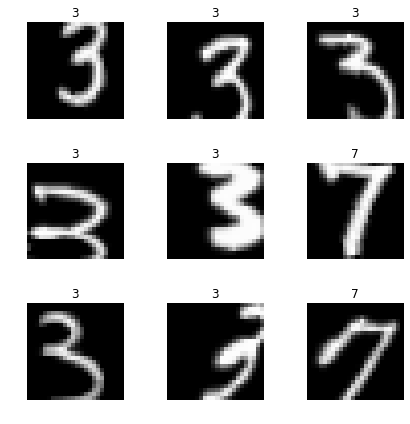

In [ ]:
data = ImageDataBunch.from_folder(untar_data(URLs.MNIST_SAMPLE),
                                  ds_tfms=tfms, size=24)
data.normalize()
data.show_batch(rows=3, figsize=(6,6))

In [ ]:
show_doc(get_annotations)

<h4 id="get_annotations" class="doc_header"><code>get_annotations</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L23" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#get_annotations-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>get_annotations</code>(**`fname`**, **`prefix`**=***`None`***)

<div class="collapse" id="get_annotations-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#get_annotations-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>get_annotations</code>:</p><p>Some other tests where <code>get_annotations</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_coco</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L267" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_coco_pickle</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L297" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_points</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L254" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Open a COCO style json in `fname` and returns the lists of filenames (with maybe `prefix`) and labelled bboxes.  

To use this dataset and collate samples into batches, you'll need to following function:

In [ ]:
show_doc(bb_pad_collate)

<h4 id="bb_pad_collate" class="doc_header"><code>bb_pad_collate</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L40" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#bb_pad_collate-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>bb_pad_collate</code>(**`samples`**:`BatchSamples`, **`pad_idx`**:`int`=***`0`***) → `Tuple`\[`FloatTensor`, `Tuple`\[`LongTensor`, `LongTensor`\]\]

<div class="collapse" id="bb_pad_collate-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#bb_pad_collate-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>bb_pad_collate</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Function that collect `samples` of labelled bboxes and adds padding with `pad_idx`.  

Finally, to apply transformations to [`Image`](/vision.image.html#Image) in a [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), we use this last class.

## ItemList specific to vision

The vision application adds a few subclasses of [`ItemList`](/data_block.html#ItemList) specific to images.

In [ ]:
show_doc(ImageList, title_level=3)

<h3 id="ImageList" class="doc_header"><code>class</code> <code>ImageList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L255" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>ImageList</code>(**\*`args`**, **`convert_mode`**=***`'RGB'`***, **`after_open`**:`Callable`=***`None`***, **\*\*`kwargs`**) :: [`ItemList`](/data_block.html#ItemList)

<div class="collapse" id="ImageList-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>ImageList</code>:</p><p>Some other tests where <code>ImageList</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_image_resize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L70" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_multi</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L227" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_vision_datasets</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L217" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

[`ItemList`](/data_block.html#ItemList) suitable for computer vision.  

Create a [`ItemList`](/data_block.html#ItemList) in `path` from filenames in `items`. `create_func` will default to [`open_image`](/vision.image.html#open_image). `label_cls` can be specified for the labels, `xtra` contains any extra information (usually in the form of a dataframe) and `processor` is applied to the [`ItemList`](/data_block.html#ItemList) after splitting and labelling.

In [ ]:
show_doc(ImageList.from_folder)

<h4 id="ImageList.from_folder" class="doc_header"><code>from_folder</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L274" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-from_folder-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>from_folder</code>(**`path`**:`PathOrStr`=***`'.'`***, **`extensions`**:`StrList`=***`None`***, **\*\*`kwargs`**) → [`ItemList`](/data_block.html#ItemList)

<div class="collapse" id="ImageList-from_folder-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-from_folder-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>from_folder</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_vision_datasets</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L217" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>from_folder</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_camvid</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L238" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_clean_tear_down</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L112" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_coco</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L267" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_coco_pickle</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L297" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_coco_same_size</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L280" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_denormalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L134" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_from_folder</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L26" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_resize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L70" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_to_image_different_tfms</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L328" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_to_image_different_y_size</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L313" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_multi_iter</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L106" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_multi_iter_broken</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L101" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_normalize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L120" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_points</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L254" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Get the list of files in `path` that have an image suffix. `recurse` determines if we search subfolders.  

In [ ]:
show_doc(ImageList.from_df)

<h4 id="ImageList.from_df" class="doc_header"><code>from_df</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L280" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-from_df-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>from_df</code>(**`df`**:`DataFrame`, **`path`**:`PathOrStr`, **`cols`**:`IntsOrStrs`=***`0`***, **`folder`**:`PathOrStr`=***`None`***, **`suffix`**:`str`=***`''`***, **\*\*`kwargs`**) → `ItemList`

<div class="collapse" id="ImageList-from_df-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-from_df-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>from_df</code>:</p><p>Some other tests where <code>from_df</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_from_csv_and_from_df</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L54" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Get the filenames in `cols` of `df` with `folder` in front of them, `suffix` at the end.  

In [ ]:
show_doc(get_image_files)

<h4 id="get_image_files" class="doc_header"><code>get_image_files</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L19" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#get_image_files-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>get_image_files</code>(**`c`**:`PathOrStr`, **`check_ext`**:`bool`=***`True`***, **`recurse`**=***`False`***) → `FilePathList`

<div class="collapse" id="get_image_files-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#get_image_files-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>get_image_files</code>:</p><p>Some other tests where <code>get_image_files</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_from_name_re</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L32" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_resize</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L70" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.  

In [ ]:
show_doc(ImageList.open)

<h4 id="ImageList.open" class="doc_header"><code>open</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L264" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-open-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>open</code>(**`fn`**)

<div class="collapse" id="ImageList-open-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-open-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>open</code>:</p><p>Some other tests where <code>open</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_download_images</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L144" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_verify_image</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L201" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_verify_images</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L190" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_vision_pil2tensor</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L348" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_vision_pil2tensor_16bit</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L379" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Open image in `fn`, subclass and overwrite for custom behavior.  

In [ ]:
show_doc(ImageList.show_xys)

<h4 id="ImageList.show_xys" class="doc_header"><code>show_xys</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L299" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-show_xys-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>show_xys</code>(**`xs`**, **`ys`**, **`imgsize`**:`int`=***`4`***, **`figsize`**:`Optional`\[`Tuple`\[`int`, `int`\]\]=***`None`***, **\*\*`kwargs`**)

<div class="collapse" id="ImageList-show_xys-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-show_xys-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show_xys</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show the `xs` (inputs) and `ys` (targets) on a figure of `figsize`.  

In [ ]:
show_doc(ImageList.show_xyzs)

<h4 id="ImageList.show_xyzs" class="doc_header"><code>show_xyzs</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L307" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-show_xyzs-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>show_xyzs</code>(**`xs`**, **`ys`**, **`zs`**, **`imgsize`**:`int`=***`4`***, **`figsize`**:`Optional`\[`Tuple`\[`int`, `int`\]\]=***`None`***, **\*\*`kwargs`**)

<div class="collapse" id="ImageList-show_xyzs-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-show_xyzs-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show_xyzs</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show `xs` (inputs), `ys` (targets) and `zs` (predictions) on a figure of `figsize`.  

In [ ]:
show_doc(ObjectCategoryList, title_level=3)

<h3 id="ObjectCategoryList" class="doc_header"><code>class</code> <code>ObjectCategoryList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L349" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ObjectCategoryList-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>ObjectCategoryList</code>(**`items`**:`Iterator`\[`T_co`\], **`classes`**:`Collection`\[`T_co`\]=***`None`***, **`label_delim`**:`str`=***`None`***, **`one_hot`**:`bool`=***`False`***, **\*\*`kwargs`**) :: [`MultiCategoryList`](/data_block.html#MultiCategoryList)

<div class="collapse" id="ObjectCategoryList-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ObjectCategoryList-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>ObjectCategoryList</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

[`ItemList`](/data_block.html#ItemList) for labelled bounding boxes.  

In [ ]:
show_doc(ObjectItemList, title_level=3)

<h3 id="ObjectItemList" class="doc_header"><code>class</code> <code>ObjectItemList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L365" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ObjectItemList-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>ObjectItemList</code>(**\*`args`**, **`convert_mode`**=***`'RGB'`***, **`after_open`**:`Callable`=***`None`***, **\*\*`kwargs`**) :: [`ImageList`](/vision.data.html#ImageList)

<div class="collapse" id="ObjectItemList-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ObjectItemList-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>ObjectItemList</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_coco</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L267" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_coco_pickle</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L297" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_coco_same_size</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L280" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

[`ItemList`](/data_block.html#ItemList) suitable for object detection.  

In [ ]:
show_doc(SegmentationItemList, title_level=3)

<h3 id="SegmentationItemList" class="doc_header"><code>class</code> <code>SegmentationItemList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L386" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#SegmentationItemList-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>SegmentationItemList</code>(**\*`args`**, **`convert_mode`**=***`'RGB'`***, **`after_open`**:`Callable`=***`None`***, **\*\*`kwargs`**) :: [`ImageList`](/vision.data.html#ImageList)

<div class="collapse" id="SegmentationItemList-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#SegmentationItemList-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>SegmentationItemList</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_camvid</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L238" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

[`ItemList`](/data_block.html#ItemList) suitable for segmentation tasks.  

In [ ]:
show_doc(SegmentationLabelList, title_level=3)

<h3 id="SegmentationLabelList" class="doc_header"><code>class</code> <code>SegmentationLabelList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L374" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#SegmentationLabelList-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>SegmentationLabelList</code>(**`items`**:`Iterator`\[`T_co`\], **`classes`**:`Collection`\[`T_co`\]=***`None`***, **\*\*`kwargs`**) :: [`ImageList`](/vision.data.html#ImageList)

<div class="collapse" id="SegmentationLabelList-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#SegmentationLabelList-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>SegmentationLabelList</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

[`ItemList`](/data_block.html#ItemList) for segmentation masks.  

In [ ]:
show_doc(PointsLabelList, title_level=3)

<h3 id="PointsLabelList" class="doc_header"><code>class</code> <code>PointsLabelList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L395" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#PointsLabelList-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>PointsLabelList</code>(**`items`**:`Iterator`\[`T_co`\], **`path`**:`PathOrStr`=***`'.'`***, **`label_cls`**:`Callable`=***`None`***, **`inner_df`**:`Any`=***`None`***, **`processor`**:`Union`\[[`PreProcessor`](/data_block.html#PreProcessor), `Collection`\[[`PreProcessor`](/data_block.html#PreProcessor)\]\]=***`None`***, **`x`**:`ItemList`=***`None`***, **`ignore_empty`**:`bool`=***`False`***) :: [`ItemList`](/data_block.html#ItemList)

<div class="collapse" id="PointsLabelList-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#PointsLabelList-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>PointsLabelList</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

[`ItemList`](/data_block.html#ItemList) for points.  

In [ ]:
show_doc(PointsItemList, title_level=3)

<h3 id="PointsItemList" class="doc_header"><code>class</code> <code>PointsItemList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L408" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#PointsItemList-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>PointsItemList</code>(**\*`args`**, **`convert_mode`**=***`'RGB'`***, **`after_open`**:`Callable`=***`None`***, **\*\*`kwargs`**) :: [`ImageList`](/vision.data.html#ImageList)

<div class="collapse" id="PointsItemList-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#PointsItemList-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>PointsItemList</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_points</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L254" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

[`ItemList`](/data_block.html#ItemList) for [`Image`](/vision.image.html#Image) to [`ImagePoints`](/vision.image.html#ImagePoints) tasks.  

In [ ]:
show_doc(ImageImageList, title_level=3)

<h3 id="ImageImageList" class="doc_header"><code>class</code> <code>ImageImageList</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L412" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageImageList-pytest" style="float:right; padding-right:10px">[test]</a></h3>

> <code>ImageImageList</code>(**\*`args`**, **`convert_mode`**=***`'RGB'`***, **`after_open`**:`Callable`=***`None`***, **\*\*`kwargs`**) :: [`ImageList`](/vision.data.html#ImageList)

<div class="collapse" id="ImageImageList-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageImageList-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>ImageImageList</code>:</p><p>Some other tests where <code>ImageImageList</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_image_to_image_different_tfms</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L328" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_image_to_image_different_y_size</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L313" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

[`ItemList`](/data_block.html#ItemList) suitable for [`Image`](/vision.image.html#Image) to [`Image`](/vision.image.html#Image) tasks.  

## Building your own dataset

This module also contains a few helper functions to allow you to build you own dataset for image classification.

In [ ]:
show_doc(download_images)

<h4 id="download_images" class="doc_header"><code>download_images</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L191" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#download_images-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>download_images</code>(**`urls`**:`StrList`, **`dest`**:`PathOrStr`, **`max_pics`**:`int`=***`1000`***, **`max_workers`**:`int`=***`8`***, **`timeout`**=***`4`***)

<div class="collapse" id="download_images-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#download_images-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>download_images</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_download_images</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L144" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Download images listed in text file `urls` to path `dest`, at most `max_pics`  

In [ ]:
show_doc(verify_images)

<h4 id="verify_images" class="doc_header"><code>verify_images</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L242" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#verify_images-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>verify_images</code>(**`path`**:`PathOrStr`, **`delete`**:`bool`=***`True`***, **`max_workers`**:`int`=***`4`***, **`max_size`**:`int`=***`None`***, **`recurse`**:`bool`=***`False`***, **`dest`**:`PathOrStr`=***`'.'`***, **`n_channels`**:`int`=***`3`***, **`interp`**=***`2`***, **`ext`**:`str`=***`None`***, **`img_format`**:`str`=***`None`***, **`resume`**:`bool`=***`None`***, **\*\*`kwargs`**)

<div class="collapse" id="verify_images-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#verify_images-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>verify_images</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_verify_images</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L190" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Check if the images in `path` aren't broken, maybe resize them and copy it in `dest`.  

It will try if every image in this folder can be opened and has `n_channels`. If `n_channels` is 3 – it'll try to convert image to RGB. If `delete=True`, it'll be removed it this fails. If `resume` – it will skip already existent images in `dest`.  If `max_size` is specified, image is resized to the same ratio so that both sizes are less than `max_size`, using `interp`. Result is stored in `dest`, `ext` forces an extension type, `img_format` and `kwargs` are passed to PIL.Image.save. Use `max_workers` CPUs.

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [ ]:
show_doc(PointsItemList.get)

<h4 id="ImageList.get" class="doc_header"><code>get</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L268" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-get-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>get</code>(**`i`**)

<div class="collapse" id="ImageList-get-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-get-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>get</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Subclass if you want to customize how to create item `i` from `self.items`.  

In [ ]:
show_doc(SegmentationLabelList.new)

<h4 id="ItemList.new" class="doc_header"><code>new</code><a href="https://github.com/fastai/fastai/blob/master/fastai/data_block.py#L93" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ItemList-new-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>new</code>(**`items`**:`Iterator`\[`T_co`\], **`processor`**:`Union`\[[`PreProcessor`](/data_block.html#PreProcessor), `Collection`\[[`PreProcessor`](/data_block.html#PreProcessor)\]\]=***`None`***, **\*\*`kwargs`**) → `ItemList`

<div class="collapse" id="ItemList-new-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ItemList-new-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>new</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Create a new [`ItemList`](/data_block.html#ItemList) from `items`, keeping the same attributes.  

In [ ]:
show_doc(ImageList.from_csv)

<h4 id="ImageList.from_csv" class="doc_header"><code>from_csv</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L290" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-from_csv-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>from_csv</code>(**`path`**:`PathOrStr`, **`csv_name`**:`str`, **`header`**:`str`=***`'infer'`***, **\*\*`kwargs`**) → `ItemList`

<div class="collapse" id="ImageList-from_csv-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-from_csv-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>from_csv</code>:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_multi</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L227" class="source_link" style="float:right">[source]</a></li></ul><p>Some other tests where <code>from_csv</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_from_csv_and_from_df</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L54" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_path_can_be_str_type</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L22" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Get the filenames in `path/csv_name` opened with `header`.  

In [ ]:
show_doc(ObjectCategoryList.get)

<h4 id="ObjectCategoryList.get" class="doc_header"><code>get</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L353" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ObjectCategoryList-get-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>get</code>(**`i`**)

<div class="collapse" id="ObjectCategoryList-get-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ObjectCategoryList-get-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>get</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Subclass if you want to customize how to create item `i` from `self.items`.  

In [ ]:
show_doc(ImageList.get)

<h4 id="ImageList.get" class="doc_header"><code>get</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L268" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-get-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>get</code>(**`i`**)

<div class="collapse" id="ImageList-get-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-get-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>get</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Subclass if you want to customize how to create item `i` from `self.items`.  

In [ ]:
show_doc(SegmentationLabelList.reconstruct)

<h4 id="SegmentationLabelList.reconstruct" class="doc_header"><code>reconstruct</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L384" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#SegmentationLabelList-reconstruct-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>reconstruct</code>(**`t`**:`Tensor`)

<div class="collapse" id="SegmentationLabelList-reconstruct-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#SegmentationLabelList-reconstruct-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>reconstruct</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Reconstruct one of the underlying item for its data `t`.  

In [ ]:
show_doc(ImageImageList.show_xys)

<h4 id="ImageImageList.show_xys" class="doc_header"><code>show_xys</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L416" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageImageList-show_xys-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>show_xys</code>(**`xs`**, **`ys`**, **`imgsize`**:`int`=***`4`***, **`figsize`**:`Optional`\[`Tuple`\[`int`, `int`\]\]=***`None`***, **\*\*`kwargs`**)

<div class="collapse" id="ImageImageList-show_xys-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageImageList-show_xys-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show_xys</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show the `xs` (inputs) and `ys`(targets)  on a figure of `figsize`.  

In [ ]:
show_doc(ImageImageList.show_xyzs)

<h4 id="ImageImageList.show_xyzs" class="doc_header"><code>show_xyzs</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L424" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageImageList-show_xyzs-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>show_xyzs</code>(**`xs`**, **`ys`**, **`zs`**, **`imgsize`**:`int`=***`4`***, **`figsize`**:`Optional`\[`Tuple`\[`int`, `int`\]\]=***`None`***, **\*\*`kwargs`**)

<div class="collapse" id="ImageImageList-show_xyzs-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageImageList-show_xyzs-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>show_xyzs</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Show `xs` (inputs), `ys` (targets) and `zs` (predictions) on a figure of `figsize`.  

In [ ]:
show_doc(ImageList.open)

<h4 id="ImageList.open" class="doc_header"><code>open</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L264" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-open-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>open</code>(**`fn`**)

<div class="collapse" id="ImageList-open-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-open-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>open</code>:</p><p>Some other tests where <code>open</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_download_images</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L144" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_verify_image</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L201" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_verify_images</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L190" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_vision_pil2tensor</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L348" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_vision_pil2tensor_16bit</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L379" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Open image in `fn`, subclass and overwrite for custom behavior.  

In [ ]:
show_doc(PointsItemList.analyze_pred)

<h4 id="ItemList.analyze_pred" class="doc_header"><code>analyze_pred</code><a href="https://github.com/fastai/fastai/blob/master/fastai/data_block.py#L85" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ItemList-analyze_pred-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>analyze_pred</code>(**`pred`**:`Tensor`)

<div class="collapse" id="ItemList-analyze_pred-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ItemList-analyze_pred-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>analyze_pred</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Called on `pred` before `reconstruct` for additional preprocessing.  

In [ ]:
show_doc(SegmentationLabelList.analyze_pred)

<h4 id="SegmentationLabelList.analyze_pred" class="doc_header"><code>analyze_pred</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L383" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#SegmentationLabelList-analyze_pred-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>analyze_pred</code>(**`pred`**, **`thresh`**:`float`=***`0.5`***)

<div class="collapse" id="SegmentationLabelList-analyze_pred-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#SegmentationLabelList-analyze_pred-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>analyze_pred</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Called on `pred` before `reconstruct` for additional preprocessing.  

In [ ]:
show_doc(PointsItemList.reconstruct)

<h4 id="ImageList.reconstruct" class="doc_header"><code>reconstruct</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L297" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-reconstruct-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>reconstruct</code>(**`t`**:`Tensor`)

<div class="collapse" id="ImageList-reconstruct-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-reconstruct-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>reconstruct</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Reconstruct one of the underlying item for its data `t`.  

In [ ]:
show_doc(SegmentationLabelList.open)

<h4 id="SegmentationLabelList.open" class="doc_header"><code>open</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L382" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#SegmentationLabelList-open-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>open</code>(**`fn`**)

<div class="collapse" id="SegmentationLabelList-open-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#SegmentationLabelList-open-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>open</code>:</p><p>Some other tests where <code>open</code> is used:</p><ul><li><code>pytest -sv tests/test_vision_data.py::test_download_images</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L144" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_verify_image</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L201" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_verify_images</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L190" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_vision_pil2tensor</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L348" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_vision_data.py::test_vision_pil2tensor_16bit</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_vision_data.py#L379" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Open image in `fn`, subclass and overwrite for custom behavior.  

In [ ]:
show_doc(ImageList.reconstruct)

<h4 id="ImageList.reconstruct" class="doc_header"><code>reconstruct</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L297" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ImageList-reconstruct-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>reconstruct</code>(**`t`**:`Tensor`)

<div class="collapse" id="ImageList-reconstruct-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ImageList-reconstruct-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>reconstruct</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Reconstruct one of the underlying item for its data `t`.  

In [ ]:
show_doc(resize_to)

<h4 id="resize_to" class="doc_header"><code>resize_to</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L198" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#resize_to-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>resize_to</code>(**`img`**, **`targ_sz`**:`int`, **`use_min`**:`bool`=***`False`***)

<div class="collapse" id="resize_to-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#resize_to-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>resize_to</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Size to resize to, to hit `targ_sz` at same aspect ratio, in PIL coords (i.e w*h)  

In [ ]:
show_doc(ObjectCategoryList.reconstruct)

<h4 id="ObjectCategoryList.reconstruct" class="doc_header"><code>reconstruct</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L358" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ObjectCategoryList-reconstruct-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>reconstruct</code>(**`t`**, **`x`**)

<div class="collapse" id="ObjectCategoryList-reconstruct-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ObjectCategoryList-reconstruct-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>reconstruct</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Reconstruct one of the underlying item for its data `t`.  

In [ ]:
show_doc(PointsLabelList.reconstruct)

<h4 id="PointsLabelList.reconstruct" class="doc_header"><code>reconstruct</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L406" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#PointsLabelList-reconstruct-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>reconstruct</code>(**`t`**, **`x`**)

<div class="collapse" id="PointsLabelList-reconstruct-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#PointsLabelList-reconstruct-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>reconstruct</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Reconstruct one of the underlying item for its data `t`.  

In [ ]:
show_doc(PointsLabelList.analyze_pred)

<h4 id="PointsLabelList.analyze_pred" class="doc_header"><code>analyze_pred</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L405" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#PointsLabelList-analyze_pred-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>analyze_pred</code>(**`pred`**, **`thresh`**:`float`=***`0.5`***)

<div class="collapse" id="PointsLabelList-analyze_pred-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#PointsLabelList-analyze_pred-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>analyze_pred</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Called on `pred` before `reconstruct` for additional preprocessing.  

In [ ]:
show_doc(PointsLabelList.get)

<h4 id="PointsLabelList.get" class="doc_header"><code>get</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L401" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#PointsLabelList-get-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>get</code>(**`i`**)

<div class="collapse" id="PointsLabelList-get-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#PointsLabelList-get-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>get</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Subclass if you want to customize how to create item `i` from `self.items`.  

## New Methods - Please document or move to the undocumented section

In [ ]:
show_doc(ObjectCategoryList.analyze_pred)

<h4 id="ObjectCategoryList.analyze_pred" class="doc_header"><code>analyze_pred</code><a href="https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L356" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ObjectCategoryList-analyze_pred-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>analyze_pred</code>(**`pred`**)

<div class="collapse" id="ObjectCategoryList-analyze_pred-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ObjectCategoryList-analyze_pred-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>analyze_pred</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Called on `pred` before `reconstruct` for additional preprocessing.  